## Analysis of data, features and neural network topology
### Data pipeline
#### Annotation of graphs
Done manually in a python-made tool, by using the mouse and keyboard.
This process should be automated.
#### Examples of information loss
### Feature Extraction
#### Difference between angles of the two longest edges ?
plot examples here... perhaps as a scatter plot of all features.
Does the perfoarmance increase if angle is < 10 for downsampling on arcs 
### Network Topology
#### Features vs. Attention Weights
### Performance in which context ?
#### Post Processing (and consequence thereof)
### Node Classification before and after post processing
### Door Position performance

## Automatic Data Collection and Annotation ?

## Defining the most useful tool for GDS
### Best use of less than 100% correct detections for the GDS ?

### Data pipeline
DWG $\rightarrow$ DXF $\rightarrow$ gpickle $\rightarrow$ networkx graph
* DWG $\rightarrow$ DXF
    * ODA Tool. 
* DXF $\rightarrow$ gpickle
    * Python wrapper for ezdxf -- 
In such a wrapper the original data from the DXF-file is sampled through linear interpolation by the use of geometric structures i.e. LINE, ARC, CIRCLE etc. which are present in the DXF format. It is questionable whether the original geometric structures should be used as node features. In the current approach it is sampled.
* gpickle $\rightarrow$ networkx graph
    * networkx
    
### Annotation of graphs
We can annotate the graphs manually by using the script "annotation_tool.py"

### Feature Extraction 




#### Length manipulation experiment

In [4]:
x = np.array([0.0,0.1,0.2,0.3, 0.5, 1.0, 5.0, 10.0, 231.0, 14000.0, 1.0e9])
print(x)
x=x+1.0
ndx=0
for i in x:
    x[ndx] = np.abs(np.log(x[ndx]))/20.0
    ndx=ndx+1
print(x)

[0.00e+00 1.00e-01 2.00e-01 3.00e-01 5.00e-01 1.00e+00 5.00e+00 1.00e+01
 2.31e+02 1.40e+04 1.00e+09]
[0.         0.00476551 0.00911608 0.01311821 0.02027326 0.03465736
 0.08958797 0.11989476 0.27233687 0.4773442  1.03616329]


In [5]:
print(np.log(1.0))
print(np.log(0.00000001))


0.0
-18.420680743952367


#### Angle Manipulation Experiment


In [6]:
x = np.array([-180, -179.0, -90.0, 0.0, 90.0, 179.0, 179.9999999, 180.0])
print(x)

old_max = 180
old_min = -180
new_max = 1
new_min = -1
old_range = old_max - old_min
new_range = new_max - new_min
for i in range(len(x)):
    x[i] = (((x[i] - old_min) * new_range) / old_range) + new_min
    
    print(np.abs(x[i]))
    if (np.abs(x[i])>0.999999999):
        x[i] = 0.0;

print(x)

[-180.        -179.         -90.           0.          90.
  179.         179.9999999  180.       ]
1.0
0.9944444444444445
0.5
0.0
0.5
0.9944444444444445
0.9999999994444446
1.0
[ 0.         -0.99444444 -0.5         0.          0.5         0.99444444
  0.          0.        ]


In the current configuration, the length is proportional to original lengths. However a proper normalization with a georefernce is not done. The logarithm emphasises the smaller changes. 

In [28]:
import os
import networkx as nx
import numpy as np

def get_labels(nxg_):
    # Get labels from netx graph
    label_dict = nx.get_node_attributes(nxg_, 'label')
    return list(label_dict.values())

folder = r'data/Public/'
data_list = 'valid_list.txt'
full_path  = folder+data_list
#data_files = [os.path.join(folder, line.rstrip()) for line in open(data_list)]
data_files = [line.rstrip() for line in open(full_path)]


nr_nodes_list = []
nr_edges_list = []
nr_door_nodes_list = []
nr_non_door_nodes_list = []
for file in data_files:
    nxg = nx.read_gpickle(folder+file)
    nr_nodes_list.append(nxg.number_of_nodes())
    nr_edges_list.append(nxg.number_of_edges())
    labels = np.asarray(get_labels(nxg))
    labels0_idx = np.where(labels == 0)[0]
    labels1_idx = np.where(labels == 1)[0]
    nr_non_door_nodes_list.append(len(labels0_idx))
    nr_door_nodes_list.append(len(labels1_idx))

total_nr_graphs = len(data_files)
total_nr_nodes = sum(nr_nodes_list)
total_nr_edges = sum(nr_edges_list)
total_nr_door_nodes = sum(nr_door_nodes_list)
total_nr_non_door_nodes = sum(nr_non_door_nodes_list)
std_of_nodes = np.std(np.asarray(nr_nodes_list), axis=0)
std_of_edges = np.std(np.asarray(nr_edges_list), axis=0)
std_of_door_nodes = np.std(np.asarray(nr_door_nodes_list), axis=0)
std_of_non_door_nodes = np.std(np.asarray(nr_non_door_nodes_list), axis=0)

print("DATASET ANALYSIS:")
print("Number of graphs: %d" % total_nr_graphs)
print("Number of nodes: %d" % total_nr_nodes)
print("Number of edges: %d" % total_nr_edges)
print("Number of door nodes: %d" % total_nr_door_nodes)
print("Number of non-door nodes: %d\n" % total_nr_non_door_nodes)
print("Door Nodes: %.2f%% " % float(total_nr_door_nodes/total_nr_nodes*100))
print("Non-door nodes: %.2f%%\n" % float(total_nr_non_door_nodes/total_nr_nodes*100))
print("Std. of nodes: %.2f" % std_of_nodes)
print("Std. of edges: %.2f" % std_of_edges)
print("Std. of door nodes: %.2f" % std_of_door_nodes)
print("Std. of non-door nodes: %.2f" % std_of_non_door_nodes)

print("Chance is: ", round(float(total_nr_non_door_nodes/total_nr_nodes*100)), "% (by guessing that all nodes belong to non-door structure)")




DATASET ANALYSIS:
Number of graphs: 13
Number of nodes: 36607
Number of edges: 34925
Number of door nodes: 4360
Number of non-door nodes: 32247

Door Nodes: 11.91% 
Non-door nodes: 88.09%

Std. of nodes: 4821.35
Std. of edges: 4691.37
Std. of door nodes: 355.67
Std. of non-door nodes: 4476.94
Chance is:  88 % (by guessing that all nodes belong to non-door structure)


In [29]:
# graph_utils.py
%matplotlib inline

import os
import networkx as nx
import dgl
import torch
import numpy as np
from src.deepwalk.deepwalk import DeepWalk
from src.sliding_window_class import SlidingWindow
sliding_window = SlidingWindow()


def norm_ang(angle, new_max=0.5, new_min=-0.5):
    old_max = 180
    old_min = -180
    #new_max = 1
    #new_min = 0
    old_range = old_max - old_min
    new_range = new_max - new_min
    out_angle = (((angle - old_min) * new_range) / old_range) + new_min
    return out_angle        


def group_labels_features(data_root, data_list, windowing=False):
    data_path = 'data/' # m: comment out
    data_files = [line.rstrip() for line in open(os.path.join(data_root, data_list))]

    # Initialize empty list
    dataset = []

    #print("loading {} files".format(len(data_files))) # m
    for idx, file in enumerate(data_files):
        graph = []
        nxg = nx.read_gpickle(os.path.join(data_root, file))


        # Get the annotated labels
        labels = get_labels(nxg)
        # Get the feature from the file
        features = chris_get_features(nxg)

        dgl_g  = dgl.from_networkx(nxg)

        # Append the information for batching
        graph.append(dgl_g)
        graph.append(labels)
        graph.append(features)
        dataset.append(graph)

    return dataset


def batch_graphs(data_root, data_list, windowing=False):
    data_files = [line.rstrip() for line in open(os.path.join(data_root, data_list))]

    all_graphs = []
    all_labels = []
    all_features = []

    for file in data_files:
        # Convert the gpickle file to a dgl graph for batching
        nxg = nx.read_gpickle(os.path.join(data_root, file))

        if windowing:
            nxg_list = sliding_window.perform_windowing(nxg)
            for nxg in nxg_list:
                # Get the annotated labels
                labels = get_labels(nxg)
                # Get the feature from the file
                features = chris_get_features(nxg)

                dgl_g  = dgl.from_networkx(nxg)

                # Append the information for batching
                all_graphs.append(dgl_g)
                all_labels.append(labels)
                all_features.append(features)
        else:
            # Get the annotated labels
            labels = get_labels(nxg)
            # Get the feature from the file
            features = chris_get_features(nxg)

            dgl_g  = dgl.from_networkx(nxg)

            # Append the information for batching
            all_graphs.append(dgl_g)
            all_labels.append(labels)
            all_features.append(features)

    # Batch the graphs
    batched_graph = dgl.batch(all_graphs)

    # all_labels is a list of tensors, so concetenate into one tensor
    conc_labels = torch.LongTensor(batched_graph.number_of_nodes(), 1)
    torch.cat(all_labels, out=conc_labels)

    # all_features is a list of tensors, so concetenate into one tensor
    conc_features = torch.Tensor(batched_graph.number_of_nodes(), 1)
    torch.cat(all_features, out=conc_features)


    return batched_graph, conc_labels, conc_features


def get_labels(nxg):
    # Get labels from netx graph
    label_dict = nx.get_node_attributes(nxg, 'label')
    labels = list(label_dict.values())
    labels = torch.LongTensor(labels)

    return labels

def convert_gpickle_to_dgl_graph(file):
    nxg = nx.read_gpickle(file)
    # Define DGL graph from netx graph
    dgl_g  = dgl.from_networkx(nxg)   

    return dgl_g


            
def calculate_angles_and_length(nxg):
    angles = []
    lengths = []
    max_diff_angles = []
    min_diff_angles = []
    
    nx.set_node_attributes(nxg, angles, 'angle')
    nx.set_edge_attributes(nxg, angles, 'angle')
    nx.set_node_attributes(nxg, lengths, 'length')
    nx.set_edge_attributes(nxg, lengths, 'length')
    nx.set_node_attributes(nxg, max_diff_angles, 'max_diff_angle')
    nx.set_edge_attributes(nxg, max_diff_angles, 'max_diff_angle')
    nx.set_node_attributes(nxg, min_diff_angles, 'min_diff_angle')
    nx.set_edge_attributes(nxg, min_diff_angles, 'min_diff_angle')
    
    # Calculate angle and distance of each edge
    for edge in nxg.edges:
        pos1 = nxg.nodes[edge[0]]['pos']
        pos2 = nxg.nodes[edge[1]]['pos']
        deltaY = pos2[1] - pos1[1]
        deltaX = pos2[0] - pos1[0]
        angleInDegrees = np.degrees(np.arctan2(deltaY, deltaX))
        norm_angle = norm_ang(angleInDegrees, 0.5, -0.5)
        nxg.edges[edge]['angle'] = norm_angle

        #if norm_angle == 0.5:
        #    norm_angle = 0.0
            
        nxg.edges[edge]['angle'] = norm_angle
        length = np.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
        '''if length == 0:
            nxg.edges[edge]['length'] = 0
        else:
            norm_length = 1/length
            nxg.edges[edge]['length'] = np.abs(np.log(norm_length))/10.0
        '''
        length=length+1.0
        nxg.edges[edge]['length'] = np.abs(np.log(length))/10.0
        
    # Calculate min and max angle for all edges going to node.
    for node in nxg.nodes:
        angle_sum = 0
        length_sum = 0
        angle_max = 0
        angle_min = 0
        length_max = 0
        length_min = 0
        diff_angle = 0
        
        for edge_idx, edge in enumerate(nxg.edges(node)):
            if edge_idx == 0:
                angle_max = nxg.edges[edge]['angle']
                angle_min = nxg.edges[edge]['angle']
                length_max = nxg.edges[edge]['length']
                length_min = nxg.edges[edge]['length']
                max_diff_angle = nxg.edges[edge]['max_diff_angle']
                min_diff_angle = nxg.edges[edge]['min_diff_angle']

            else:
                if np.abs(nxg.edges[edge]['angle']) > np.abs(angle_max):
                    
                    diff_angle = nxg.edges[edge]['angle']-angle_max                    
                    angle_max = nxg.edges[edge]['angle']           
                    
                if np.abs(nxg.edges[edge]['angle']) < np.abs(angle_min):
                    angle_min = nxg.edges[edge]['angle']
                if nxg.edges[edge]['length'] > length_max:
                    length_max = nxg.edges[edge]['length']
                if nxg.edges[edge]['length'] < length_min:
                    length_min = nxg.edges[edge]['length']                 

            angle_sum += nxg.edges[edge]['angle']
            length_sum += nxg.edges[edge]['length']
            
        if len(nxg.edges(node)) == 0:
            nxg.nodes[node]['angle'] = 0
            nxg.nodes[node]['length'] = 0
            nxg.nodes[node]['max_angle'] = 0
            nxg.nodes[node]['min_angle'] = 0
            nxg.nodes[node]['max_length'] = 0
            nxg.nodes[node]['min_length'] = 0
            nxg.nodes[node]['max_diff_angle'] = 0
            nxg.nodes[node]['min_diff_angle'] = 0
        else:
            nxg.nodes[node]['angle'] = angle_sum / len(nxg.edges(node))
            nxg.nodes[node]['length'] = length_sum / len(nxg.edges(node))
            nxg.nodes[node]['max_angle'] = angle_max
            nxg.nodes[node]['min_angle'] = angle_min
            nxg.nodes[node]['max_length'] = length_max
            nxg.nodes[node]['min_length'] = length_min
            nxg.nodes[node]['max_diff_angle'] = max_diff_angle
            nxg.nodes[node]['min_diff_angle'] = min_diff_angle
            
    # ------------------------------------#        
    # maximum and minimum difference angle
    # ------------------------------------#
    for node_ndx, node in enumerate(nxg.nodes):
        # maximum difference angle
        max_diff_angle = 0.0
        if node == 0:
            prev_edge_angle = 0.0
        else:  
            for edge_idx, edge in enumerate(nxg.edges(node)):
                if np.abs( nxg.edges[edge]['angle']-prev_edge_angle ) > np.abs(max_diff_angle) :
                    max_diff_angle = nxg.edges[edge]['angle']-prev_edge_angle
                    tmp_prev_edge_angle = nxg.edges[edge]['angle']
            prev_edge_angle = tmp_prev_edge_angle
        if len(nxg.edges(node)) == 0:
            nxg.nodes[node]['max_diff_angle'] = 0
        else:
            nxg.nodes[node]['max_diff_angle'] = max_diff_angle
            
        # minimum difference angle
        for edge_idx, edge in enumerate(nxg.edges(node)):
            test_angle = nxg.edges[edge]['angle']
            
            if edge[0]-edge[1] > 0: # if minimum is in the opposite direction of previously, then subtract by adding -0.5 (negative of angle normalization value)
                test_angle = test_angle - 0.5
            
            if edge_idx==0: # initialization assumes that first difference is smallest
                min_diff_angle = test_angle-prev_edge_angle
                tmp_prev_edge_angle = test_angle

            if np.abs( test_angle-prev_edge_angle ) < np.abs(min_diff_angle) : 
                min_diff_angle = nxg.edges[edge]['angle']-prev_edge_angle
                tmp_prev_edge_angle = nxg.edges[edge]['angle']
                
        prev_edge_angle = tmp_prev_edge_angle
        
        if len(nxg.edges(node)) == 0:
            nxg.nodes[node]['min_diff_angle'] = 0
        else:
            nxg.nodes[node]['min_diff_angle'] = min_diff_angle


def chris_get_features(nxg):

    # % % Define some features for the graph
    # % Normalized positions
    positions = nx.get_node_attributes(nxg, 'pos')
    positions = list(positions.values())
    norm_positions = normalize_positions(positions)
    norm_positions = torch.FloatTensor(norm_positions)

    # % Normalized node degree (number of edges connected to node)
    dgl_g  = dgl.from_networkx(nxg)

    norm_degrees = 1. / dgl_g.in_degrees().float().unsqueeze(1)

    # % Normalized unique identity (entity type [ARC/CRCLE/LINE])
    id_dict = nx.get_node_attributes(nxg, 'id')
    ids = list(id_dict.values())
    for idx, id in enumerate(ids):
        if id == 0:
            ids[idx] = 0
        else:
            ids[idx] = 1. / id

    norm_identity = np.linspace(0, 1, num=nxg.number_of_nodes())
    norm_identity = np.reshape(norm_identity, (nxg.number_of_nodes(), 1))
    norm_identity = torch.FloatTensor(norm_identity)

    norm_ids = torch.FloatTensor(np.asarray(ids).reshape(-1, 1))


    
    # Angles:
    calculate_angles_and_length(nxg)
    angles = nx.get_node_attributes(nxg, 'angle')
    angles = list(angles.values())
    angles = torch.FloatTensor(np.asarray(angles).reshape(-1, 1))

    lengths = nx.get_node_attributes(nxg, 'length')
    lengths = list(lengths.values())
    lengths = torch.FloatTensor(np.asarray(lengths).reshape(-1, 1))

    max_angle = nx.get_node_attributes(nxg, 'max_angle')
    max_angle = list(max_angle.values())
    max_angle = torch.FloatTensor(np.asarray(max_angle).reshape(-1, 1))

    min_angle = nx.get_node_attributes(nxg, 'min_angle')
    min_angle = list(min_angle.values())
    min_angle = torch.FloatTensor(np.asarray(min_angle).reshape(-1, 1))

    max_length = nx.get_node_attributes(nxg, 'max_length')
    max_length = list(max_length.values())
    max_length = torch.FloatTensor(np.asarray(max_length).reshape(-1, 1))

    min_length = nx.get_node_attributes(nxg, 'min_length')
    min_length = list(min_length.values())
    min_length = torch.FloatTensor(np.asarray(min_length).reshape(-1, 1))
    
    max_diff_angles = nx.get_node_attributes(nxg, 'max_diff_angle')
    max_diff_angles = list(max_diff_angles.values())
    max_diff_angles = torch.FloatTensor(np.asarray(max_diff_angles).reshape(-1, 1))

    min_diff_angles = nx.get_node_attributes(nxg, 'min_diff_angle')
    min_diff_angles = list(min_diff_angles.values())
    min_diff_angles = torch.FloatTensor(np.asarray(min_diff_angles).reshape(-1, 1))
    
    # % Combine all features into one tensor
    #features = torch.cat((norm_positions, norm_deg, norm_ids, embedding_feat), 1)
    features = torch.cat((norm_degrees, max_angle, min_angle, max_length, min_length), 1)
    # features = torch.cat((norm_degrees, angles, lengths), 1)

    return features

def normalize_positions(positions):
    norm_pos = []
    min_x = min(positions)[0]
    min_y = min(positions)[1]
    max_x = max(positions)[0]
    max_y = max(positions)[1]
    if min_x < 0:
        max_x = max_x - min_x
    if min_y < 0:
        max_y = max_y - min_y
    for position in positions:
        temp_pos = []
        x_pos = 0
        y_pos = 0
        if min_x < 0:
            x_pos = position[0] - min_x
        if min_y < 0:
            y_pos = position[1] - min_y
        x_pos = position[0] / max_x
        y_pos = position[1] / max_y
        temp_pos = tuple([x_pos, y_pos])
        norm_pos.append(temp_pos)
    return norm_pos


# % % Define some features for the graph
# % Normalized positions
nxg = nx.read_gpickle("data/Public/"+file)

positions = nx.get_node_attributes(nxg, 'pos')
positions = list(positions.values())
norm_positions = normalize_positions(positions)
norm_positions = torch.FloatTensor(norm_positions)

# % Normalized node degree (number of edges connected to node)
dgl_g  = dgl.from_networkx(nxg)

norm_degrees = 1. / dgl_g.in_degrees().float().unsqueeze(1)

# % Normalized entity type (ARC/CRCLE/LINE)

id_dict = nx.get_node_attributes(nxg, 'id')
ids = list(id_dict.values())
for idx, id in enumerate(ids):
    if id == 0:
        ids[idx] = 0
    else:
        ids[idx] = 1. / id

norm_identity = np.linspace(0, 1, num=nxg.number_of_nodes())
norm_identity = np.reshape(norm_identity, (nxg.number_of_nodes(), 1))
norm_identity = torch.FloatTensor(norm_identity)

norm_ids = torch.FloatTensor(np.asarray(ids).reshape(-1, 1))

for node in nxg.nodes:            
    nxg.nodes[node]['norm_ids'] = norm_ids[node]
    nxg.nodes[node]['norm_degrees'] = norm_degrees[node]
#    nx.set_node_attributes(nxg, norm_ids, 'id')


# Angles and lengths:
calculate_angles_and_length(nxg)
angles = nx.get_node_attributes(nxg, 'angle')
angles = list(angles.values())
angles = torch.FloatTensor(np.asarray(angles).reshape(-1, 1))

lengths = nx.get_node_attributes(nxg, 'length')
lengths = list(lengths.values())
lengths = torch.FloatTensor(np.asarray(lengths).reshape(-1, 1))

max_angle = nx.get_node_attributes(nxg, 'max_angle')
max_angle = list(max_angle.values())
max_angle = torch.FloatTensor(np.asarray(max_angle).reshape(-1, 1))

min_angle = nx.get_node_attributes(nxg, 'min_angle')
min_angle = list(min_angle.values())
min_angle = torch.FloatTensor(np.asarray(min_angle).reshape(-1, 1))

max_length = nx.get_node_attributes(nxg, 'max_length')
max_length = list(max_length.values())
max_length = torch.FloatTensor(np.asarray(max_length).reshape(-1, 1))

min_length = nx.get_node_attributes(nxg, 'min_length')
min_length = list(min_length.values())
min_length = torch.FloatTensor(np.asarray(min_length).reshape(-1, 1))

max_diff_angles = nx.get_node_attributes(nxg, 'max_diff_angle')
max_diff_angles = list(max_diff_angles.values())
max_diff_angles = torch.FloatTensor(np.asarray(max_diff_angles).reshape(-1, 1))

min_diff_angles = nx.get_node_attributes(nxg, 'min_diff_angle')
min_diff_angles = list(min_diff_angles.values())
min_diff_angles = torch.FloatTensor(np.asarray(min_diff_angles).reshape(-1, 1))

# % Combine all features into one tensor
#features = torch.cat((norm_positions, norm_deg, norm_ids, embedding_feat), 1)
features = torch.cat((norm_degrees, norm_ids, min_angle, max_length, min_length), 1)
# features = torch.cat((norm_degrees, angles, lengths), 1)




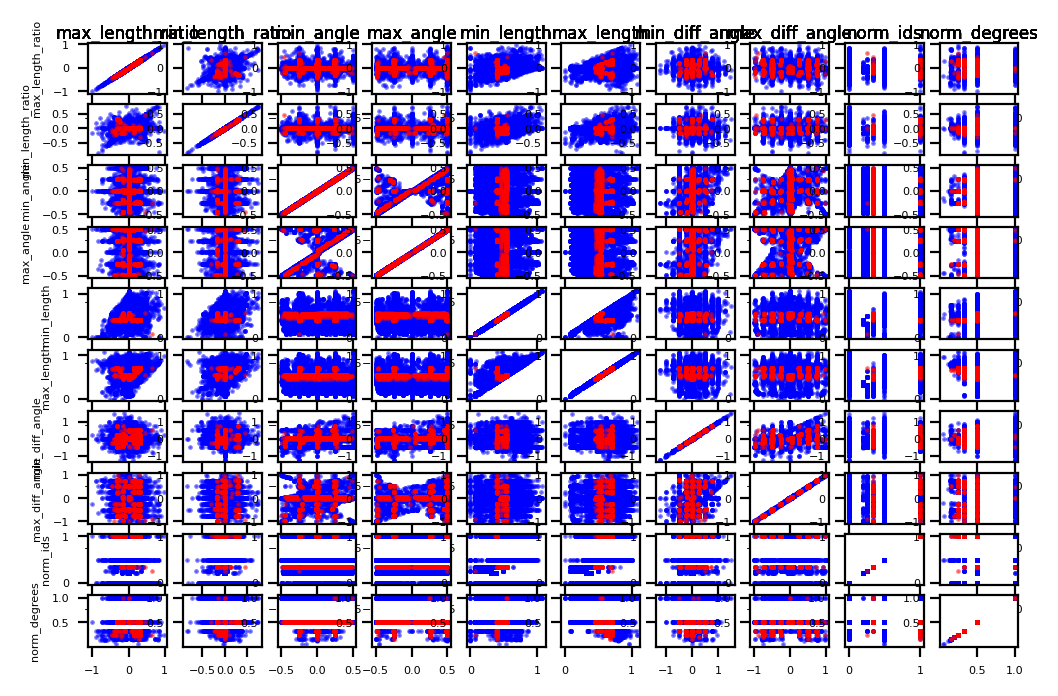

In [25]:
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=4)
plt.rc('ytick',labelsize=4)

featureString = ['max_length_ratio','min_length_ratio','min_angle','max_angle','min_length','max_length','min_diff_angle','max_diff_angle','norm_ids','norm_degrees']

# manually collect the first attribute entry
tmp = nx.get_node_attributes(nxg, featureString[0])
x = np.transpose([np.array(list(tmp.values()))])
# collect the rest of the attributes
for i in range(len(featureString)-1):
    tmp = nx.get_node_attributes(nxg, featureString[i+1])
    tmp2 = np.transpose([np.array(list(tmp.values()))])
    x = np.column_stack((x,tmp2))


num_features = len(featureString) # +1 due to norm_degree not formatted
fig, ax = plt.subplots(nrows=num_features, ncols=num_features,dpi=200)

for rr in range(num_features):
    for cc in range(num_features):
        ax[rr,cc].scatter(x[np.where(labels==0),cc],x[np.where(labels==0),rr],marker=".",c="blue",s=2,alpha=0.5)
        ax[rr,cc].scatter(x[np.where(labels==1),cc],x[np.where(labels==1),rr],marker=".",c="Red" ,s=2,alpha=0.5)
        #ax[rr,cc].xticks(fontsize=6)
        plt.text(0.5, 1.08, featureString[cc],
         horizontalalignment='center',
         fontsize=6,
         transform = ax[0,cc].transAxes)
        ax[rr,0].set_ylabel(featureString[rr],fontsize=4)


feat_class_door = features[np.where(labels==1)][1]
feat_class_nondoor = features[np.where(labels==0)][1]


## Feature: Maximum Difference Angle

In [4]:
    # Calculate min and max angle for all edges going to node.
    for node_ndx, node in enumerate(nxg.nodes):
        # 1) for 1st node: Define max_diff_angle as "0"
        # 1) save prev_edge_angle as "0"
        # 2) next node:    Check all edge angles difference to prev_edge_angle
        # 2) at max diff angle, save diff angle and prev_edge_angle
        max_diff_angle = 0.0
        if node == 0:
            prev_edge_angle = 0.0
        #else:
        for edge_idx, edge in enumerate(nxg.edges(node)):
            if edge_idx==0: # initialization assumes that first difference is largest
                max_diff_angle = nxg.edges[edge]['angle']-prev_edge_angle
                tmp_prev_edge_angle = nxg.edges[edge]['angle']
            #print("---------------- node", node)
            #print("- NEW test angle", nxg.edges[edge]['angle'])
            if np.abs( nxg.edges[edge]['angle']-prev_edge_angle ) > np.abs(max_diff_angle) : # uden > np.abs(diff_angle) : ??
                max_diff_angle = nxg.edges[edge]['angle']-prev_edge_angle
                tmp_prev_edge_angle = nxg.edges[edge]['angle']
                #print(" **** tmp_prev_edge_angle: ",tmp_prev_edge_angle)
                #print("max_diff_angle: ", max_diff_angle)
        prev_edge_angle = tmp_prev_edge_angle
        #print("** prev_edge_angle ***********: " ,prev_edge_angle)
        
        if len(nxg.edges(node)) == 0:
            nxg.nodes[node]['max_diff_angle'] = 0
        else:
            nxg.nodes[node]['max_diff_angle'] = max_diff_angle

## Feature: Minimum Difference Angle

In [5]:
    # Calculate min and max angle for all edges going to node.
    for node_ndx, node in enumerate(nxg.nodes):
        # 1) for 1st node: Define min_diff_angle as "0"
        # 1) save prev_edge_angle as "0"
        # 2) next node:    Check all edge angles difference to prev_edge_angle
        # 2) at max diff angle, save diff angle and prev_edge_angle
          
        for edge_idx, edge in enumerate(nxg.edges(node)):
            test_angle = nxg.edges[edge]['angle']
            
            #print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
            
            if edge[0]-edge[1] > 0: # if minimum is in the opposite direction the subtract -0.5 (negative of angle normalization value)
                test_angle = test_angle - 0.5
                opposite_direction_flag  = True
            
            if edge_idx==0: # initialization assumes that first difference is smallest
                min_diff_angle = test_angle-prev_edge_angle
                tmp_prev_edge_angle = test_angle

            #print("---------------- node", node, " ------------------")
            #print(edge)
            #print("- NEW edge angle", test_angle, "-", prev_edge_angle, " I DIFF TO: ", min_diff_angle)


            if np.abs( test_angle-prev_edge_angle ) < np.abs(min_diff_angle) : 
                min_diff_angle = nxg.edges[edge]['angle']-prev_edge_angle
                tmp_prev_edge_angle = nxg.edges[edge]['angle']
                #print(" **** tmp_prev_edge_angle *** : ",tmp_prev_edge_angle)
                #print("min_diff_angle: ", min_diff_angle)
        prev_edge_angle = tmp_prev_edge_angle
        #print(" ------- \nDONE \n** prev_edge_angle found ***************: " ,prev_edge_angle)
        
        if len(nxg.edges(node)) == 0:
            nxg.nodes[node]['min_diff_angle'] = 0
        #else if min_diff_angle > 1.0
        else:
            nxg.nodes[node]['min_diff_angle'] = min_diff_angle
    #print(max(min_diff_angle))

# Feature: Maximum Length Ratio (Growing)

In [62]:
for node_ndx, node in enumerate(nxg.nodes):
    # 1) for 1st node: Define max_diff_angle as "0"
    # 1) save prev_edge_angle as "0"
    # 2) next node:    Check all edge angles difference to prev_edge_angle
    # 2) at max diff angle, save diff angle and prev_edge_angle
    max_length_ratio = 0.0
    if node == 0:
        prev_edge_length = 0.0
    #else:
    for edge_idx, edge in enumerate(nxg.edges(node)):
        if edge_idx==0: # initialization assumes that first difference is largest
            max_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
            
        #print("---------------- node ---------------", node)
        #print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
        #print("- NEW test length", nxg.edges[edge]['length'])
        
        #print(nxg.edges[edge]['length']-prev_edge_length, ">", max_length_ratio)
        
        if nxg.edges[edge]['length']-prev_edge_length > max_length_ratio : 
            max_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
    
            #print(" **** tmp_prev_edge_length: ",tmp_prev_edge_length)
            #print("max_length_ratio: ", max_length_ratio)
    
    prev_edge_length = tmp_prev_edge_length
    #print("** prev_edge_length ***********: " ,prev_edge_length)

    if len(nxg.edges(node)) == 0:
        nxg.nodes[node]['max_length_ratio'] = 0
    else:
        nxg.nodes[node]['max_length_ratio'] = max_length_ratio

# Feature: Maximum Length Ratio (Absolute)

In [21]:
for node_ndx, node in enumerate(nxg.nodes):
    # 1) for 1st node: Define max_diff_angle as "0"
    # 1) save prev_edge_angle as "0"
    # 2) next node:    Check all edge angles difference to prev_edge_angle
    # 2) at max diff angle, save diff angle and prev_edge_angle
    max_length_ratio = 0.0
    if node == 0:
        prev_edge_length = 0.0
    #else:
    for edge_idx, edge in enumerate(nxg.edges(node)):
        if edge_idx==0: # initialization assumes that first difference is largest
            max_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
            
        #print("---------------- node ---------------", node)
        #print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
        #print("- NEW test length", nxg.edges[edge]['length'])
        
        #print("new: ", nxg.edges[edge]['length'], "previous: ", prev_edge_length, "comparison: ",  max_length_ratio)
        #print(np.abs(nxg.edges[edge]['length']-prev_edge_length), ">", np.abs(max_length_ratio))
        
        if np.abs(nxg.edges[edge]['length']-prev_edge_length) > np.abs(max_length_ratio) : 
            max_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
    
            #print(" **** tmp_prev_edge_length: ",tmp_prev_edge_length)
            #print("max_length_ratio: ", max_length_ratio)
    
    prev_edge_length = tmp_prev_edge_length
    #print("** prev_edge_length ***********: " ,prev_edge_length)

    if len(nxg.edges(node)) == 0:
        nxg.nodes[node]['max_length_ratio'] = 0
    else:
        nxg.nodes[node]['max_length_ratio'] = max_length_ratio
print

<function print>

# Feature: Minimum Length Ratio (Absolute)
Check node direction and probably exclude if opposite and same as just checked !

In [24]:
for node_ndx, node in enumerate(nxg.nodes):
    # 1) for 1st node: Define max_diff_angle as "0"
    # 1) save prev_edge_angle as "0"
    # 2) next node:    Check all edge angles difference to prev_edge_angle
    # 2) at max diff angle, save diff angle and prev_edge_angle
    min_length_ratio = 0.0
    if node == 0:
        prev_edge_length = 0.0
        nxg.nodes[node]['min_length_ratio'] = 0
        # run through full loop and find minimum length except the first edge ehich is zero
        for edge_idx, edge in enumerate(nxg.edges(node)):
            if (edge_idx==0): # first value at position zero is always 0. We dont want this value
                tmp_min = 1000000.0                
            if (edge_idx>0 and tmp_min>nxg.edges[edge]['length']): # compare to find minimum.
                tmp_min = nxg.edges[edge]['length']
                prev_edge_length = tmp_min
        continue
    
    for edge_idx, edge in enumerate(nxg.edges(node)):
        #print("---------------- node ---------------", node, "edge_idx: ",edge_idx)
        #print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
        #print("NEW LENGTH__________: ", nxg.edges[edge]['length'])
        if edge[0]-edge[1] > 0: # if opposite node-direction then skip comparison in this iteration of loop
            skipped = True
            continue
        if (edge_idx==0 or skipped==True): # initialization assumes that first ratio is smallest (same length)
            skipped = False
            min_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
            #print(" **** tmp_prev_edge FROM FIRST IDX: ",tmp_prev_edge_length)
            
            
        ##print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
        ##print("- NEW test length", nxg.edges[edge]['length'])
        #print("new: ", nxg.edges[edge]['length'], "previous: ", prev_edge_length, "comparison: ",  min_length_ratio)
        #print(np.abs(nxg.edges[edge]['length']-prev_edge_length), "<", np.abs(min_length_ratio))
        
        if np.abs(nxg.edges[edge]['length']-prev_edge_length) < np.abs(min_length_ratio) : 
            min_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
    
            #print(" **** tmp_prev_edge_length: ",tmp_prev_edge_length)
            #print("min_length_ratio FOUND: ", min_length_ratio)
    
    prev_edge_length = tmp_prev_edge_length
    #print("** prev_edge_length ***********: " ,prev_edge_length)

    if len(nxg.edges(node)) == 0:
        nxg.nodes[node]['min_length_ratio'] = 0
    else:
        nxg.nodes[node]['min_length_ratio'] = min_length_ratio

# Feature: Minimum Length Ratio

In [58]:
for node_ndx, node in enumerate(nxg.nodes):
    # 1) for 1st node: Define max_diff_angle as "0"
    # 1) save prev_edge_angle as "0"
    # 2) next node:    Check all edge angles difference to prev_edge_angle
    # 2) at max diff angle, save diff angle and prev_edge_angle
    min_length_ratio = 0.0
    #if node == 0:
    #    prev_edge_angle = 0.0
    #else:
    for edge_idx, edge in enumerate(nxg.edges(node)):
        if edge_idx==0: # initialization assumes that first difference is largest
            min_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
            
        #print("---------------- node", node)
        #print("edge[0]"," - edge[1]:", edge[0], "-", edge[1], "=",edge[0]-edge[1])
        #print("- NEW test length", nxg.edges[edge]['length'])
        
        if nxg.edges[edge]['length']-prev_edge_length < min_length_ratio :
            min_length_ratio = nxg.edges[edge]['length']-prev_edge_length
            tmp_prev_edge_length = nxg.edges[edge]['length']
    
            #print(" **** tmp_prev_edge_length: ",tmp_prev_edge_length)
            #print("min_length_ratio: ", min_length_ratio)
    
    prev_edge_length = tmp_prev_edge_length
    #print("** prev_edge_length ***********: " ,prev_edge_length)

    if len(nxg.edges(node)) == 0:
        nxg.nodes[node]['min_length_ratio'] = 0
    else:
        nxg.nodes[node]['min_length_ratio'] = min_length_ratio

# Feature: Max Angle

In [15]:
angles = []
lengths = []
max_diff_angles = []
min_diff_angles = []

nx.set_node_attributes(nxg, angles, 'angle')
nx.set_edge_attributes(nxg, angles, 'angle')
nx.set_node_attributes(nxg, lengths, 'length')
nx.set_edge_attributes(nxg, lengths, 'length')
nx.set_node_attributes(nxg, max_diff_angles, 'max_diff_angle')
nx.set_edge_attributes(nxg, max_diff_angles, 'max_diff_angle')
nx.set_node_attributes(nxg, min_diff_angles, 'min_diff_angle')
nx.set_edge_attributes(nxg, min_diff_angles, 'min_diff_angle')

# Calculate angle and distance of each edge
for edge in nxg.edges:
    pos1 = nxg.nodes[edge[0]]['pos']
    pos2 = nxg.nodes[edge[1]]['pos']
    deltaY = pos2[1] - pos1[1]
    deltaX = pos2[0] - pos1[0]
    angleInDegrees = np.degrees(np.arctan2(deltaY, deltaX))
    norm_angle = norm_ang(angleInDegrees,0.5,-0.5)
    nxg.edges[edge]['angle'] = norm_angle

    length = np.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
    #if length == 0:
    #    nxg.edges[edge]['length'] = 0
    #else:
    #    norm_length = 1/length
    #    nxg.edges[edge]['length'] = np.abs(np.log(norm_length))/10.0

    length=length+1.0
    nxg.edges[edge]['length'] = np.abs(np.log(length))/10.0 # for 20: 1e9 is scaled to 1.

# Mean angle of all edges going to node.
for node in nxg.nodes:
    angle_sum = []
    length_sum = []
    angle_max = []
    angle_min = []
    length_max = []
    length_min = []
    tmp_prev_edge_angle = 0

    for edge_idx, edge in enumerate(nxg.edges(node)):
        if edge_idx == 0:
            angle_max = nxg.edges[edge]['angle']
            angle_min = nxg.edges[edge]['angle']
            length_max = nxg.edges[edge]['length']
            length_min = nxg.edges[edge]['length']
        else:
            if np.abs(nxg.edges[edge]['angle']) > np.abs(angle_max):
                angle_max = nxg.edges[edge]['angle']
            if np.abs(nxg.edges[edge]['angle']) < np.abs(angle_min):
                angle_min = nxg.edges[edge]['angle']
            if nxg.edges[edge]['length'] > length_max:
                length_max = nxg.edges[edge]['length']
            if nxg.edges[edge]['length'] < length_min:
                length_min = nxg.edges[edge]['length']

        angle_sum += nxg.edges[edge]['angle']
        length_sum += nxg.edges[edge]['length']
    if len(nxg.edges(node)) == 0:
        nxg.nodes[node]['angle'] = 0
        nxg.nodes[node]['length'] = 0
        nxg.nodes[node]['max_angle'] = 0
        nxg.nodes[node]['min_angle'] = 0
        nxg.nodes[node]['max_length'] = 0
        nxg.nodes[node]['min_length'] = 0
    else:
        nxg.nodes[node]['angle'] = angle_sum / len(nxg.edges(node))
        nxg.nodes[node]['length'] = length_sum / len(nxg.edges(node))
        nxg.nodes[node]['max_angle'] = angle_max
        nxg.nodes[node]['min_angle'] = angle_min
        nxg.nodes[node]['max_length'] = length_max
        nxg.nodes[node]['min_length'] = length_min



# plot result
plt.rc('xtick',labelsize=4)
plt.rc('ytick',labelsize=4)

featureString = ['min_angle','max_angle']

# manually collect the first attribute entry
tmp = nx.get_node_attributes(nxg, featureString[0])
x = np.transpose([np.array(list(tmp.values()))])
    
# collect the rest of the attributes
for i in range(len(featureString)-1):
    tmp = nx.get_node_attributes(nxg, featureString[i+1])
    tmp2 = np.transpose([np.array(list(tmp.values()))])
    x = np.column_stack((x,tmp2))


num_features = len(featureString) # +1 due to norm_degree not formatted
fig, ax = plt.subplots(nrows=num_features, ncols=num_features,dpi=200)

for rr in range(num_features):
    for cc in range(num_features):
        ax[rr,cc].scatter(x[np.where(labels==0),cc],x[np.where(labels==0),rr],marker=".",c="blue",s=2,alpha=0.5)
        ax[rr,cc].scatter(x[np.where(labels==1),cc],x[np.where(labels==1),rr],marker=".",c="Red" ,s=2,alpha=0.5)
        #ax[rr,cc].xticks(fontsize=6)
        plt.text(0.5, 1.08, featureString[cc],
         horizontalalignment='center',
         fontsize=6,
         transform = ax[0,cc].transAxes)
        ax[rr,0].set_ylabel(featureString[rr],fontsize=4)

NameError: name 'plt' is not defined

In [16]:
tmp = nx.get_node_attributes(nxg, 'min_diff_angle');
x5 = np.transpose([np.array(list(tmp.values()))])
print(edge[0]-edge[1])
#print(np.max(x5))
featureString = ['min_angle','max_angle','min_length','max_diff_angle','min_diff_angle']
print(featureString)

1
['min_angle', 'max_angle', 'min_length', 'max_diff_angle', 'min_diff_angle']


### Attention Weights

# Accuracy/Loss -- Trained Model with Angle and Distance Features
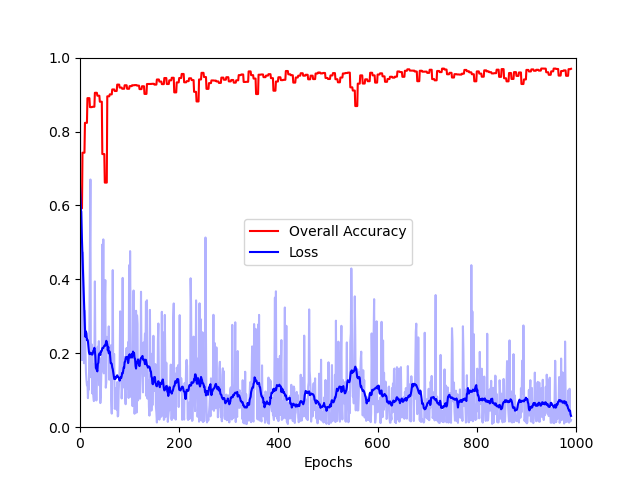


# Prediction 
### First we define Prediction utility functions

In [26]:
import torch
import src.graph_utils as graph_utils
import src.models as models
import matplotlib.pyplot as plt
import os
import networkx as nx
import argparse
import math
import numpy as np
from itertools import count
from sklearn.cluster import DBSCAN

def load_model_txt(model_name):
    model_txt = 'trained_models/' + model_name + '/predict_info.txt'
    data = [line.rstrip() for line in open(model_txt)]

    # network train on ()
    net = data[0]

    # Number of features per node
    n_features = int(data[1])

    # Number of classes
    n_classes = int(data[2])

    return net, n_features, n_classes


def draw(results, ax, nx_G, positions):
    cls1color = 'r'
    cls2color = 'b'

    colors = []
    for v in range(len(nx_G)):
        cls = results[v]
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    nx.draw_networkx(nx_G.to_undirected(), positions, node_color=colors,
            with_labels=False, node_size=10, ax=ax)


def draw_inst(nx_G, ax, positions):

    groups = set(nx.get_node_attributes(nx_G, 'instance').values())
    mapping = dict(zip(sorted(groups), count()))
    nodes = nx_G.nodes()
    colors = [mapping[nx_G.nodes[n]['instance']] for n in nodes]

    ax.axis('off')
    nx.draw_networkx(nx_G.to_undirected(), positions, node_color=colors,
                     with_labels=False, node_size=10, ax=ax, cmap=plt.cm.jet)



def post_processing(nxg_, predictions_): # heuristics

    # Graph morphology closing
    predictions_alt = []
    for node in nxg_.nodes:
        nr_non_door_nodes = 0
        nr_door_nodes = 0

        # Get 2-order proximity neighbors
        all_neighbors = []
        neighbors = list(nxg_.neighbors(node))
        for neighbor in neighbors:
            neighbors2 = list(nxg_.neighbors(neighbor))
            all_neighbors.append(neighbors2)
        all_neighbors.append(list(neighbors))
        all_neighbors = [item for sublist in all_neighbors for item in sublist]
        all_neighbors = set(all_neighbors)
        if node in all_neighbors:
            all_neighbors.remove(node)

        for neighbor in all_neighbors:
            neighbor_class = predictions_[neighbor]
            if neighbor_class == 0:
                nr_non_door_nodes += 1
            if neighbor_class == 1:
                nr_door_nodes += 1

        # If the number of door nodes in the 2-order proximity is higher than
        # the number of non-door nodes the current node is set to be a door node
        if nr_door_nodes >= nr_non_door_nodes:
            predictions_alt.append(1)
        else:
            predictions_alt.append(predictions_[node])

    return predictions_alt


def instancing(nxg_, predictions, instance=1):
    door_indices = []
    for idx, prediction in enumerate(predictions):
        if prediction == instance:
            door_indices.append(idx)
    sub_nxg = nxg_.subgraph(door_indices)
    return sub_nxg


def reject_outliers_IQR(dataIn, lower_factor=2.0, higher_factor=6.0):
    q25, q75 = np.percentile(dataIn, 25), np.percentile(dataIn, 75)
    iqr = q75 - q25
    cut_off_upper = iqr * higher_factor
    cut_off_lower = iqr * lower_factor
    lower, upper = q25 - cut_off_lower, q75 + cut_off_upper
    inliers = []
    for idx, data in enumerate(dataIn):
        if (data > lower) and (data < upper):
            inliers.append(idx)
    return inliers


def reject_outliers_hardcoded(areas, lengths, heights, ratios):
    inliers = []
    for idx, data in enumerate(zip(areas, lengths, heights, ratios)):
        area, length, height, ratio = data
        if ratio > 0.3 and length < 3000 and height < 3000:
            inliers.append(idx)
    return inliers


def bounding_box_params(points):
    bot_left_x = min(point[0] for point in points)
    bot_left_y = min(point[1] for point in points)
    top_right_x = max(point[0] for point in points)
    top_right_y = max(point[1] for point in points)

    width = top_right_x - bot_left_x
    height = top_right_y - bot_left_y

    width_height_list = [width, height]
    max_box = max(width_height_list)
    min_box = min(width_height_list)
    ratio = min_box/max_box

    return width * height, height, width, ratio


def find_furthest_node(G, source_node):
    furthest_node = None
    max_furthest_node_length = 0
    for idx, node in enumerate(G.nodes):
        max_path_length = 0
        try:
            paths = nx.all_shortest_paths(G, source=source_node, target=node)
            for path in map(nx.utils.pairwise, paths):
                path_length = 0
                for edge in path:
                    pos1 = G._node[edge[0]]['pos']
                    pos2 = G._node[edge[1]]['pos']
                    path_length += np.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
                    if path_length > max_path_length:
                        max_path_length = path_length
            if max_path_length > max_furthest_node_length:
                max_furthest_node_length = max_path_length
                furthest_node = node
        except:
            pass
    return furthest_node


def rotate_line_segment(a, b, angle):
    midpoint = [
        (a[0] + b[0]) / 2,
        (a[1] + b[1]) / 2
    ]

    a_mid = [
        a[0] - midpoint[0],
        a[1] - midpoint[1]
    ]
    b_mid = [
        b[0] - midpoint[0],
        b[1] - midpoint[1]
    ]

    a_rotated = [
        np.cos(angle) * a_mid[0] - np.sin(angle) * a_mid[1],
        np.sin(angle) * a_mid[0] + np.cos(angle) * a_mid[1]
    ]
    b_rotated = [
        np.cos(angle) * b_mid[0] - np.sin(angle) * b_mid[1],
        np.sin(angle) * b_mid[0] + np.cos(angle) * b_mid[1]
    ]

    a_rotated[0] = a_rotated[0] + midpoint[0]
    a_rotated[1] = a_rotated[1] + midpoint[1]
    b_rotated[0] = b_rotated[0] + midpoint[0]
    b_rotated[1] = b_rotated[1] + midpoint[1]

    return [a_rotated, b_rotated]


def find_longest_edge_center(G):
    max_edge_length = 0
    max_edge_node_1 = 0
    max_edge_node_2 = 0
    for edge in list(G.edges):
        node_1 = edge[0]
        node_2 = edge[1]
        pos1 = G._node[edge[0]]['pos']
        pos2 = G._node[edge[1]]['pos']
        edge_length = np.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
        if edge_length > max_edge_length:
            max_edge_length = edge_length
            max_edge_node_1 = node_1
            max_edge_node_2 = node_2
    max_pos1 = G._node[max_edge_node_1]['pos']
    max_pos2 = G._node[max_edge_node_2]['pos']
    center_point = [(max_pos1[0] + max_pos2[0])/2.0,
                    (max_pos1[1] + max_pos2[1])/2.0]
    g_copy = G.copy()
    g_copy.remove_edge(max_edge_node_1, max_edge_node_2)
    g_copy.add_node(0, pos=center_point)
    g_copy.add_edges_from([(0, max_edge_node_1), (0, max_edge_node_2)])
    furthest_from_center = find_furthest_node(g_copy, 0)
    return 0, furthest_from_center, g_copy


def generalize_doors_new(disjoint_sub_graphs):
    list_gen_door_graphs = []
    for subgraph in disjoint_sub_graphs:
        # Get degree to see if cyclical
        all_degrees = []
        for node in subgraph.nodes:
            neighbors = [n for n in subgraph.neighbors(node)]
            try:
                neighbors.remove(node)
            except ValueError:
                pass
            degree = len(neighbors)
            all_degrees.append(degree)

        bCyclical = all(x == 2 for x in all_degrees)
        if bCyclical == True:
            center_node, furthest_from_center, new_graph = find_longest_edge_center(subgraph)
            furthest_node_1 = center_node
            furthest_node_2 = furthest_from_center
            subgraph = new_graph
        else:
            source_node = list(subgraph.nodes)[0]
            furthest_node_1 = find_furthest_node(subgraph, source_node)
            furthest_node_2 = find_furthest_node(subgraph, furthest_node_1)
        orig_pos_1 = subgraph.nodes[furthest_node_1]['pos']
        orig_pos_2 = subgraph.nodes[furthest_node_2]['pos']
        x1 = orig_pos_1[0]
        y1 = orig_pos_1[1]
        x2 = orig_pos_2[0]
        y2 = orig_pos_2[1]
        dx = x2 - x1
        dy = y2 - y1
        angle = np.arctan2(dy, dx)
        angle_degrees = np.degrees(angle) + 180
        alt_angle = None
        if 0 < angle_degrees < 20:
            alt_angle = -angle
        elif 70 < angle_degrees < 90:
            alt_angle = np.radians(90) - angle
        elif 90 < angle_degrees < 110:
            alt_angle = np.radians(90) - angle
        elif 160 < angle_degrees < 180:
            alt_angle = np.radians(180) - angle
        elif 180 < angle_degrees < 200:
            alt_angle = np.radians(180) - angle
        elif 250 < angle_degrees < 270:
            alt_angle = np.radians(270) - angle
        elif 270 < angle_degrees < 290:
            alt_angle = np.radians(270) - angle
        elif 340 < angle_degrees < 360:
            alt_angle = np.radians(360) - angle
        if alt_angle is not None:
            rot_pos_1, rot_pos_2 = rotate_line_segment(orig_pos_1, orig_pos_2, alt_angle)
            x1 = rot_pos_1[0]
            y1 = rot_pos_1[1]
            x2 = rot_pos_2[0]
            y2 = rot_pos_2[1]
            dx = x2 - x1
            dy = y2 - y1

        dx_1 = x2 - x1
        dy_1 = y2 - y1
        regular_vec1 = normalize([dx_1, dy_1]) * 100
        x1 = x1 - regular_vec1[0]
        y1 = y1 - regular_vec1[1]

        dx_2 = x1 - x2
        dy_2 = y1 - y2
        regular_vec2 = normalize([dx_2, dy_2]) * 100
        x2 = x2 - regular_vec2[0]
        y2 = y2 - regular_vec2[1]

        norm1 = [-dy, dx]
        norm2 = [dy, -dx]
        mag1 = math.sqrt(norm1[0]**2 + norm1[1]**2)
        mag2 = math.sqrt(norm2[0] ** 2 + norm2[1] ** 2)
        scale_factor = 100
        pos0 = [scale_factor*(norm1[0]/mag1) + x1, scale_factor*(norm1[1]/mag1) + y1]
        pos1 = [scale_factor*(norm2[0]/mag2) + x1, scale_factor*(norm2[1]/mag2) + y1]
        pos2 = [scale_factor*(norm1[0]/mag1) + x2, scale_factor*(norm1[1]/mag1) + y2]
        pos3 = [scale_factor*(norm2[0]/mag2) + x2, scale_factor*(norm2[1]/mag2) + y2]
        gen_door_graph = nx.Graph()
        gen_door_graph.add_node(0, pos=pos0)
        gen_door_graph.add_node(1, pos=pos1)
        gen_door_graph.add_node(2, pos=pos2)
        gen_door_graph.add_node(3, pos=pos3)
        gen_door_graph.add_edges_from([(0, 1), (1, 3), (3, 2), (2, 0)])
        list_gen_door_graphs.append(gen_door_graph.copy())
        gen_door_graph.clear()
    return list_gen_door_graphs


def perpendicular(a):
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b


def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)


def generalize_doors(disjoint_sub_graphs):
    list_gen_door_graphs = []
    bIsSubgraphDoor = True
    for subgraph in disjoint_sub_graphs:
        # % Pick a node (hopefully middle)
        nodes_list = list(subgraph.nodes)
        try:
            node_number = nodes_list[5]
            bIsSubgraphDoor = True
        except IndexError:
            bIsSubgraphDoor = False

        if bIsSubgraphDoor:

            # % Get list of connecting edges to the particular node
            edge_neighbor_list = list(nx.dfs_edges(subgraph, source=node_number))

            # % Now sort the list of edges from left and right neighbors
            right_neighbors = []
            left_neighbors = []
            # First edge always includes the node in question
            right_neighbors.append(edge_neighbor_list[0])
            edge_neighbor_list.remove(edge_neighbor_list[0])

            for edge in edge_neighbor_list:
                if edge[0] == node_number:
                    break
                right_neighbors.append(edge)

            remaining_edges = [x for x in edge_neighbor_list if x not in right_neighbors]
            left_neighbors = remaining_edges

            # % Now you have the two endpoints of the subgraph
            try:
                left_most_node = left_neighbors[-1][1]
                right_most_node = right_neighbors[-1][1]
            except IndexError:
                # Then we have accidently picked not the middle node
                if len(right_neighbors) != 0:
                    left_most_node = node_number
                    right_most_node = right_neighbors[-1][1]
                else:
                    left_most_node = left_neighbors[-1][1]
                    right_most_node = node_number

            # % Generate new graph for generalized door
            gen_door_graph = nx.Graph()

            orig_pos_1 = subgraph.nodes[left_most_node]['pos']
            orig_pos_2 = subgraph.nodes[right_most_node]['pos']
            x1 = orig_pos_1[0]
            y1 = orig_pos_1[1]
            x2 = orig_pos_2[0]
            y2 = orig_pos_2[1]


            norm_perp_1 = perpendicular(normalize([x1, y1]))
            norm_perp_2 = perpendicular(normalize([x2, y2]))
            gen_door_graph.add_node(0, pos=norm_perp_1)
            gen_door_graph.add_node(1, pos=-norm_perp_1)
            gen_door_graph.add_node(2, pos=norm_perp_2)
            gen_door_graph.add_node(3, pos=-norm_perp_2)
            gen_door_graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

            # % Append new graph to be plotted later on
            list_gen_door_graphs.append(gen_door_graph.copy())
            gen_door_graph.clear()

    return list_gen_door_graphs


def predict(data_path, predict_path, model_name, plotFlag=False):
    # Read the parameters of the trained model
    net, n_features, n_classes = load_model_txt(model_name)

    # Load the trained model
    trained_net, config = models.get_model_and_config(net)
    model = trained_net(n_features,
                        n_classes,
                        *config['extra_args'])
    model_path = 'trained_models/' + model_name + '/model.pth'
    model.load_state_dict(torch.load(model_path))

    # Get the list of files for prediction
    pred_files = [os.path.join(data_path, line.rstrip()) for line in open(os.path.join(data_path, predict_path))]
    for file in pred_files:
        # Convert the gpickle file to a dgl graph
        dgl_g = graph_utils.convert_gpickle_to_dgl_graph(file)
        # Get the features from the given graph
        nxg = nx.read_gpickle(file)
        features = graph_utils.chris_get_features(nxg)
        if plotFlag:
            # plot gpickle graph
            '''f = plt.figure()
            nx.draw(nxg, ax=f.add_subplot(111))'''

        model.eval()
        with torch.no_grad():
            logits = model(dgl_g, features)
            _, predictions = torch.max(logits, dim=1)
            predictions = predictions.numpy()

        # Get positions
        nxg = nx.read_gpickle(file)
        positions = nx.get_node_attributes(nxg, 'pos')
        positions = list(positions.values())
        if plotFlag:
            # Plot graph
            ''''fig2 = plt.figure(dpi=150)
            fig2.clf()
            ax = fig2.subplots()
            inst_predictions = [0] * nxg.number_of_nodes()
            draw(inst_predictions, ax, nxg, positions)'''

            # Plot predicted graphs 
            fig1 = plt.figure(dpi=150)
            fig1.clf()
            ax = fig1.subplots()
            draw(predictions, ax, nxg, positions)

        # Get labels
        labels = nx.get_node_attributes(nxg, 'label')
        labels = np.array(list(labels.values()))
        if plotFlag:
            # Plot ground truth annotations
            fig2 = plt.figure(dpi=150)
            fig2.clf()
            ax = fig2.subplots()
            draw(labels, ax, nxg, positions)

        # Perform graph morphology closing
        predictions_alt = predictions
        # predictions_alt = post_processing(nxg, predictions)

        # Extract door nodes
        sub_nxg = instancing(nxg, predictions_alt)

        # Separate disjoint graphs (instancing)
        disjoint_sub_graphs = []
        for c in nx.connected_components(sub_nxg):
            disjoint_sub_graphs.append(sub_nxg.subgraph(c))

        clustered_disjoint_sub_graphs = []
        for graph in disjoint_sub_graphs:
            sub_positions = nx.get_node_attributes(graph, 'pos')
            sub_positions = np.array(list(sub_positions.values()))
            clustering = DBSCAN(eps=1100, min_samples=1).fit(sub_positions)
            cluster_labels = clustering.labels_
            graph_keys = list(graph._NODE_OK.nodes)
            for cluster_label in list(set(cluster_labels)):
                indices = []
                for idx, label in enumerate(cluster_labels):
                    if label == cluster_label:
                        indices.append(graph_keys[idx])
                sub_graph = graph.subgraph(indices)
                clustered_disjoint_sub_graphs.append(sub_graph)

        # Remove graphs not meeting conditions
        min_nr_nodes = 8
        selected_graphs = []
        area_list = []
        width_list = []
        height_list = []
        ratio_list = []

        for disjoint_sub_graph in clustered_disjoint_sub_graphs:
            if disjoint_sub_graph.number_of_nodes() > min_nr_nodes:
                selected_graphs.append(disjoint_sub_graph)
                tmp_positions = nx.get_node_attributes(disjoint_sub_graph, 'pos')
                tmp_positions = np.array(list(tmp_positions.values()))
                area, width, height, ratio = bounding_box_params(tmp_positions)
                area_list.append(area)
                width_list.append(width)
                height_list.append(height)
                ratio_list.append(ratio)

        seleted_graphs_joined = nx.Graph()

        for idx, graph in enumerate(selected_graphs):
            nx.set_node_attributes(graph, [], 'instance')
            for node in graph.nodes:
                graph.nodes[node]['instance'] = idx
            seleted_graphs_joined = nx.compose(seleted_graphs_joined, graph)

        inliers = reject_outliers_hardcoded(area_list, width_list, height_list, ratio_list)
        selected_graphs = [selected_graphs[i] for i in inliers]

        
        print("'In {0} \n number of suggested doors: {1}'".format(file, len(selected_graphs)))

        seleted_graphs_joined = nx.Graph()

        for idx, graph in enumerate(selected_graphs):
            nx.set_node_attributes(graph, [], 'instance')
            for node in graph.nodes:
                graph.nodes[node]['instance'] = idx
            seleted_graphs_joined = nx.compose(seleted_graphs_joined, graph)

        # Generalizing
        list_gen_doors = generalize_doors_new(selected_graphs)

        # Get a graph where door instance have been deleted
        nondoor_graph = nxg.copy()
        door_nodes_list = seleted_graphs_joined.nodes
        nondoor_graph.remove_nodes_from(door_nodes_list)

        # Plot graph with generalized doors
        pos = nx.get_node_attributes(nxg, 'pos')
        if plotFlag:
            fig5 = plt.figure(dpi=150)
            fig5.clf()
            ax = fig5.subplots()
            nx.draw(nondoor_graph, pos, with_labels=False, node_size=10, ax=ax, node_color='b')

        door_generalized_graph = nx.Graph()
        nondoor_graph = nx.convert_node_labels_to_integers(nondoor_graph)
        door_generalized_graph = nx.compose(door_generalized_graph, nondoor_graph)
        door_graph = nx.Graph()
        for g_idx, g in enumerate(list_gen_doors):
            gen_pos = nx.get_node_attributes(g, 'pos')
            if plotFlag:
                nx.draw(g, gen_pos, with_labels=False, node_color='g', node_size=30, ax=ax)
                nx.draw_networkx_edges(g, gen_pos, width=2, alpha=0.8, edge_color='g')
            g = nx.convert_node_labels_to_integers(g, first_label=4*g_idx)
            door_graph = nx.compose(door_graph, g)
        door_graph = nx.convert_node_labels_to_integers(door_graph, first_label=door_generalized_graph.number_of_nodes())
        door_generalized_graph = nx.compose(door_generalized_graph, door_graph)

        if plotFlag:
            '''fig6 = plt.figure(dpi=150)
            fig6.clf()
            ax = fig6.subplots()
            door_generalized_graph_pos = nx.get_node_attributes(door_generalized_graph, 'pos')
            nx.draw(door_generalized_graph, door_generalized_graph_pos, with_labels=False, node_size=10, ax=ax, node_color='r')

            #door_graph = nx.convert_node_labels_to_integers(door_graph)
            # plot bounding boxes after post processing
            fig7 = plt.figure(dpi=150)
            fig7.clf()
            ax = fig7.subplots()
            door_graph_pos = nx.get_node_attributes(door_graph, 'pos')
            nx.draw(door_graph, door_graph_pos, with_labels=False, node_size=10, ax=ax,
                node_color='g')'''

        # Save res graph
        base = os.path.basename(file)
        file_name = os.path.splitext(base)[0]

        if plotFlag:
            # Plot graph with instances
            '''fig4 = plt.figure(dpi=150)
            fig4.clf()
            ax = fig4.subplots()
            #ax.axis('equal')
            draw_inst(seleted_graphs_joined, ax, positions)'''
        if plotFlag:
            plt.show()


In [27]:
%matplotlib inline
data_path=r'data/Public'
predict_path='test_list.txt'
model_name='gat_20-09-20_09-59-05'#gat_20-06-10_14-37-22_beast'#gat_20-09-09_09-43-31_5features'# gat_20-05-22_19-04-14_final')#
        
predict(data_path, predict_path, model_name, True)


AttributeError: module 'src.graph_utils' has no attribute 'chris_get_features'

In [51]:
%matplotlib notebook
data_path=r'data/Public'
predict_path='debug_list.txt'
model_name='gat_20-06-10_14-37-22_beast'#gat_20-09-09_09-43-31_5features'# gat_20-05-22_19-04-14_final')#
        
predict(data_path, predict_path, model_name, True)

NameError: name 'predict' is not defined

# Unexpected Graph Data

data/Public/Canterbury/anno/M_S1_Becket_Second_Floor_w_annotations.gpickle
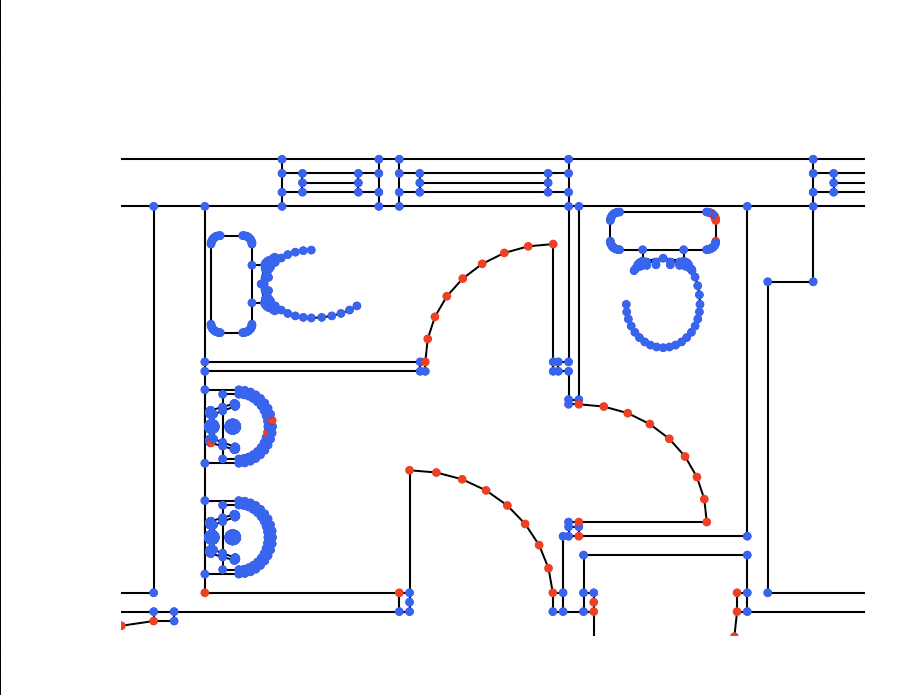
data/Public/AU/anno/L1327_H1_E3_K13.03_B07.01_N001_ZEtage_3_w_annotations.gpickle
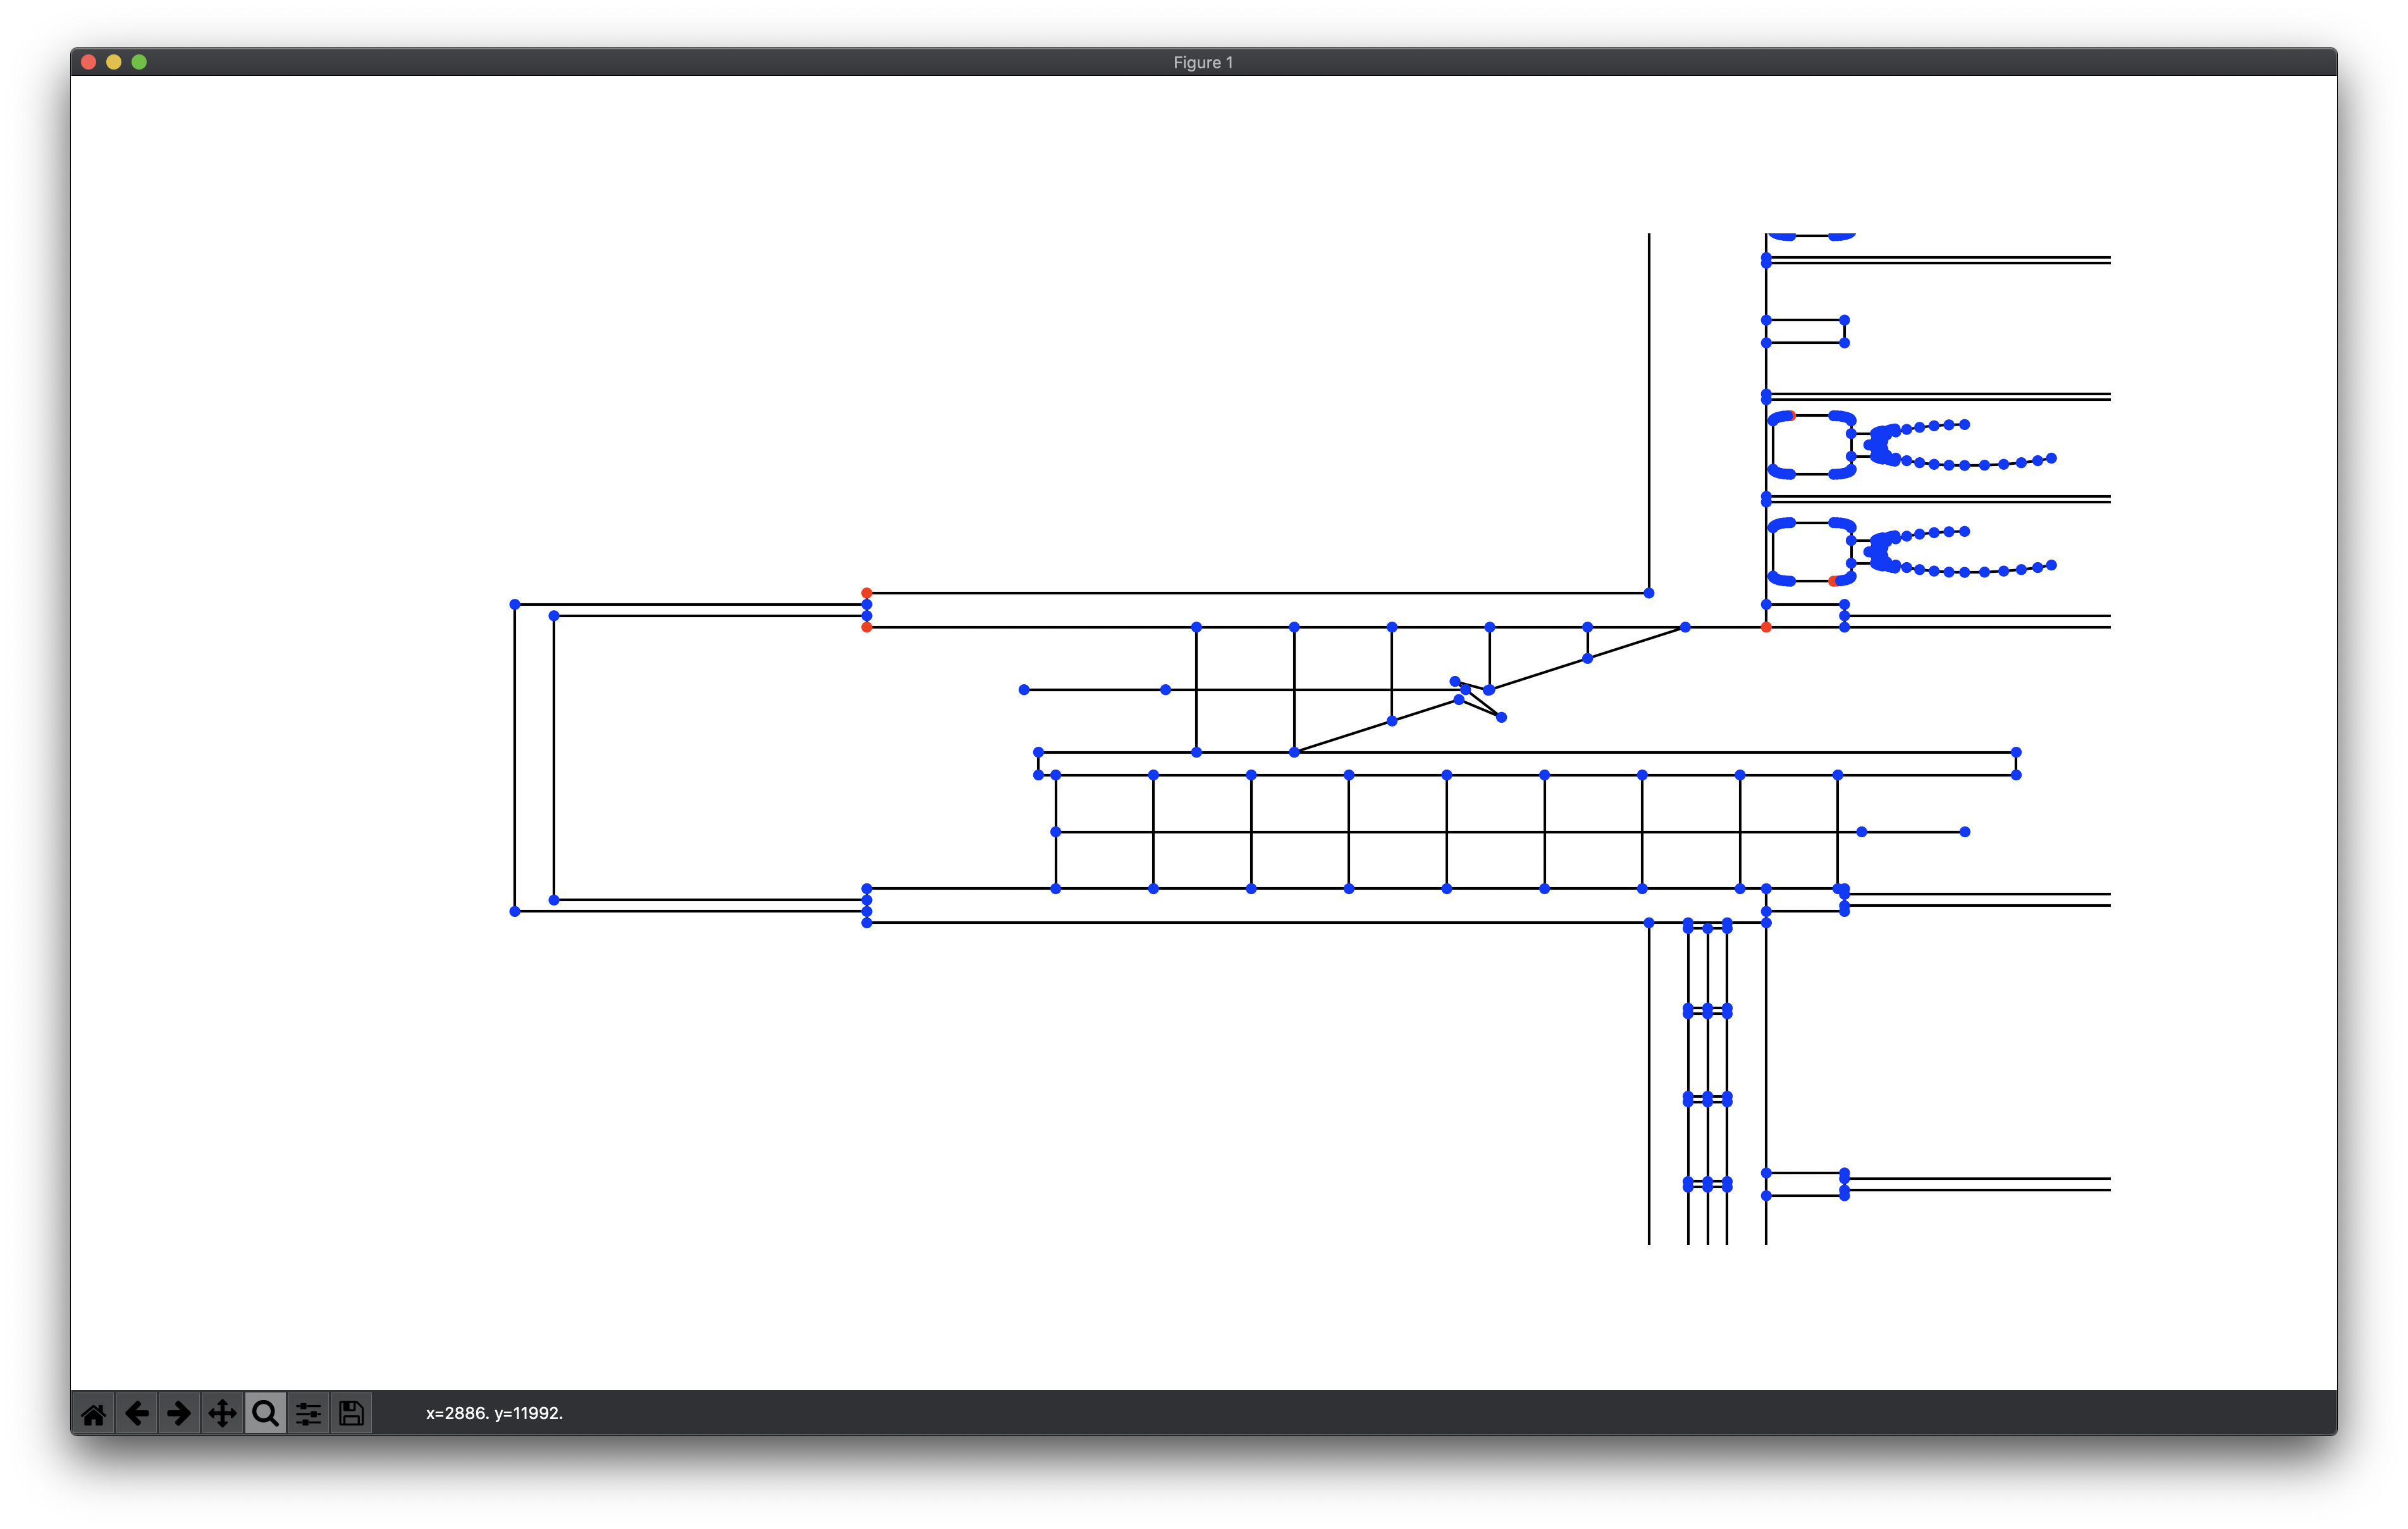
data/Public/AU/anno/L1414_H1_E1_K13.03_B07.01_N01_ZEtage_1_w_annotations.gpickle
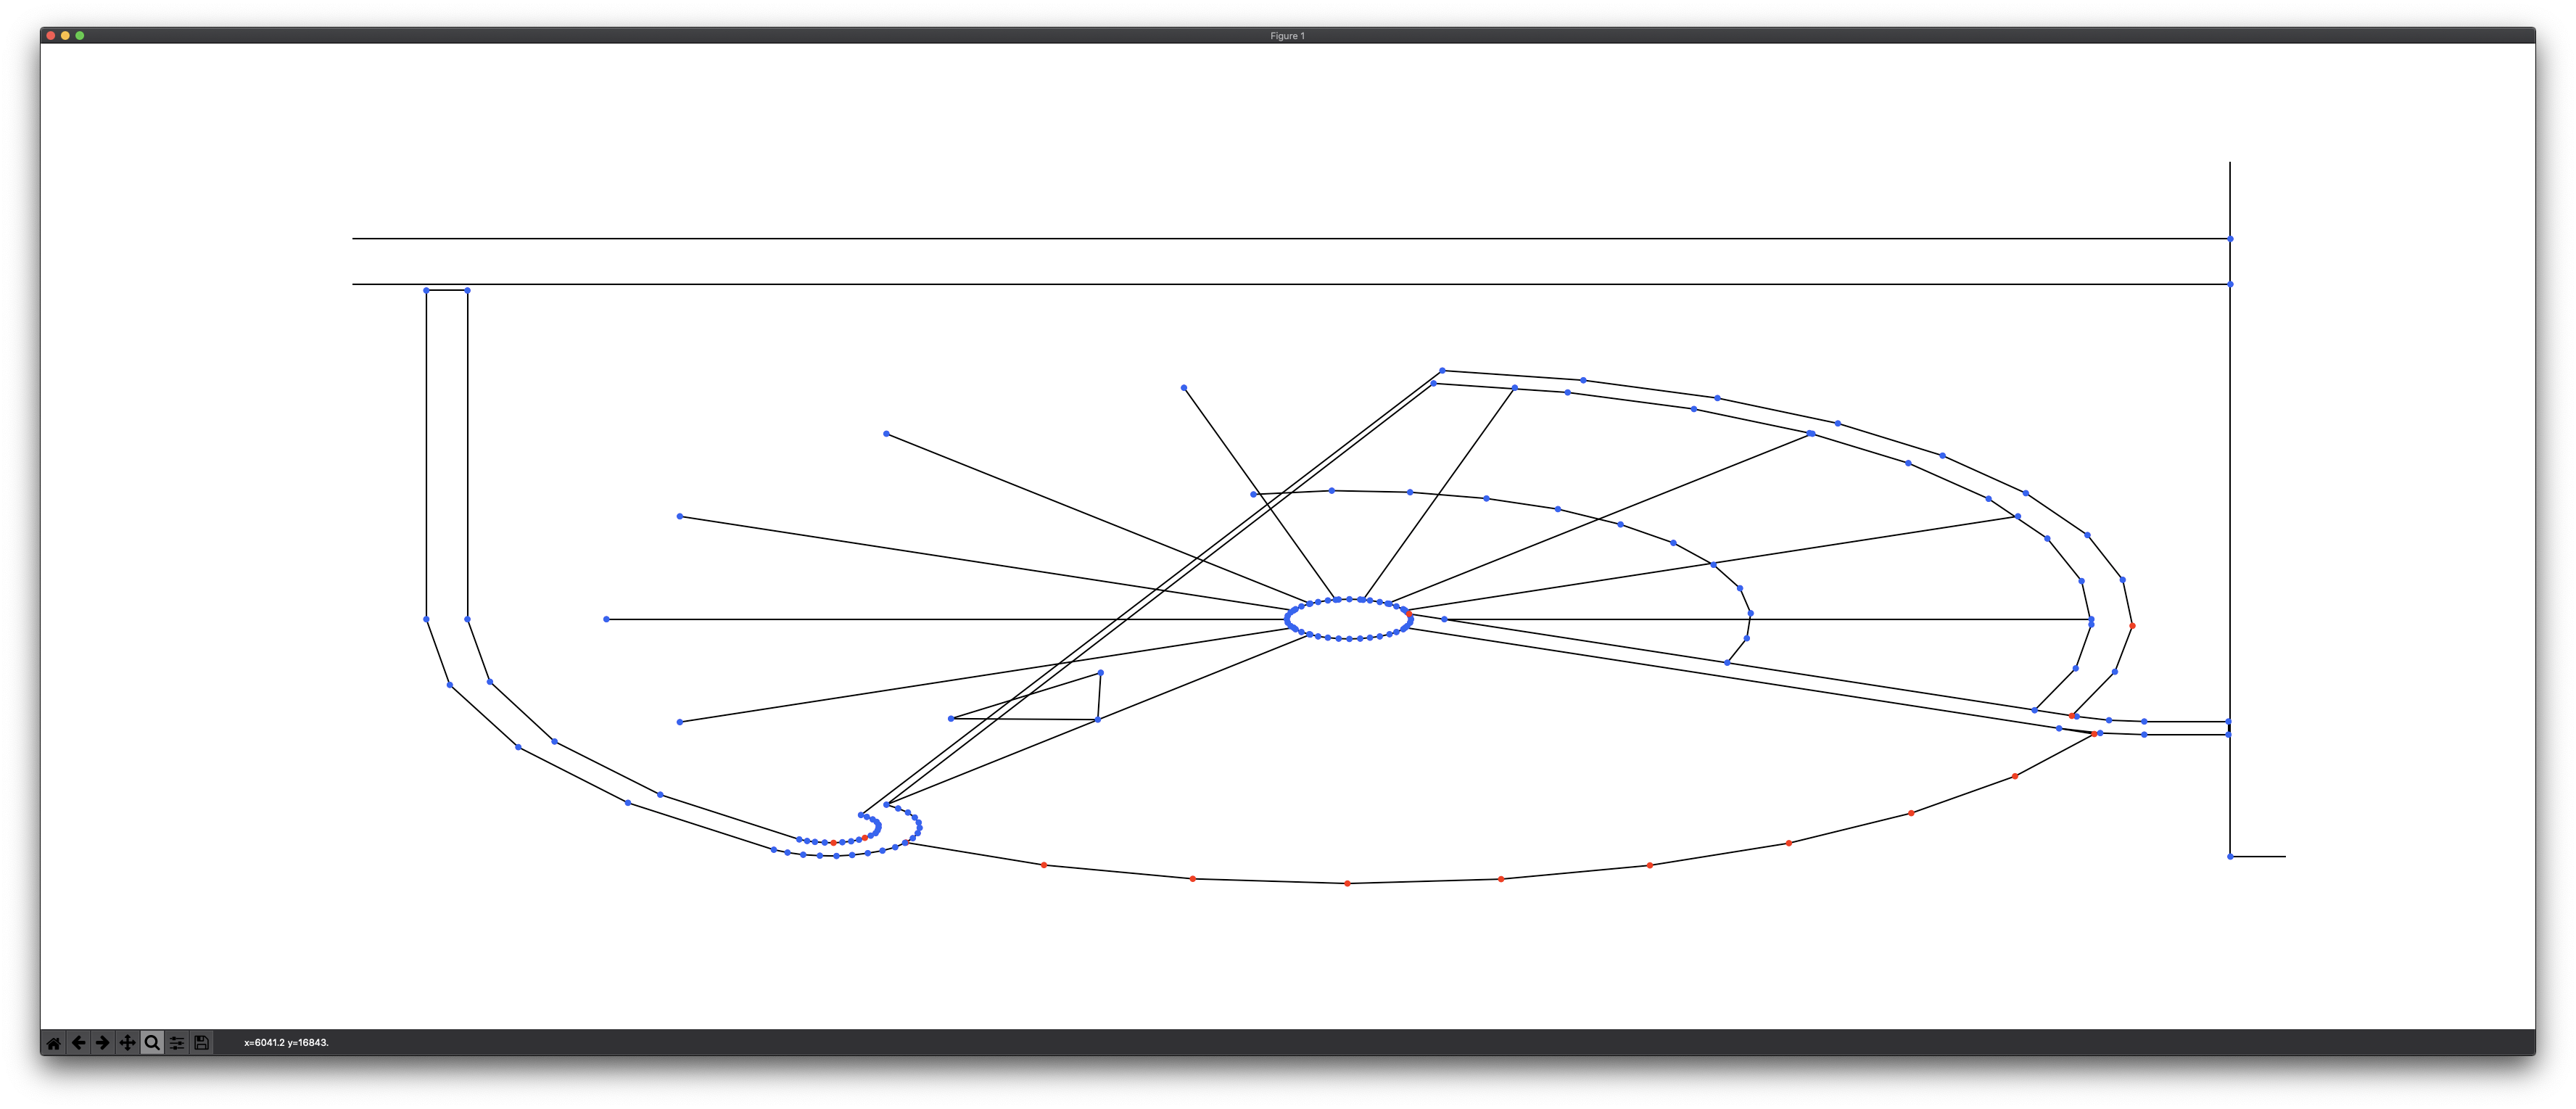
